<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/All_Semester_Codes/ML_sem7/models/ML07_A_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME:** SANJANA ASRANI

**DIV:** D17B

**ROLL NO.:** 01

**ML EXP-07:** KMEANS

**Instructions:**

1. Perform k means clustering and execute the following steps
2. Decide how many clusters you want, i.e. choose k
3. Randomly assign a centroid to each of the k clusters
4. Calculate the distance of all observation to each of the k centroids
5. Assign observations to the closest centroid
6. Find the new location of the centroid by taking the mean of all the observations in each cluster
7. Repeat steps 3-5 until the centroids do not change position


help me do this, make an addition, provide the user with a choice to chose what kind of distance the user wants to use, manhattan, euclidean, etc. the data u can generate by urself and hardcode it.

In [ ]:
import numpy as np

# Generate sample data (you can replace this with your own dataset)
data = np.array([[1, 2],
                 [1, 3],
                 [2, 3],
                 [8, 7],
                 [9, 8],
                 [8, 9]])

# Number of clusters (k)
k = 2

# Choose distance metric (Euclidean or Manhattan)
distance_metric = input("Choose distance metric (euclidean or manhattan): ").strip().lower()

# Randomly initialize centroids
np.random.seed(0)  # For reproducibility
centroids = data[np.random.choice(data.shape[0], k, replace=False)]

def calculate_distance(point1, point2):
    if distance_metric == 'euclidean':
        return np.linalg.norm(point1 - point2)
    elif distance_metric == 'manhattan':
        return np.sum(np.abs(point1 - point2))
    else:
        raise ValueError("Invalid distance metric. Choose 'euclidean' or 'manhattan'.")

# Initialize variables to track cluster assignments
cluster_assignments = np.zeros(data.shape[0], dtype=int)

# Start K-Means iteration
max_iterations = 100
for _ in range(max_iterations):
    # Calculate distances and assign data points to the closest centroid
    for i, point in enumerate(data):
        distances = [calculate_distance(point, centroid) for centroid in centroids]
        cluster_assignments[i] = np.argmin(distances)

    # Update centroids based on the mean of data points in each cluster
    new_centroids = np.array([data[cluster_assignments == j].mean(axis=0) for j in range(k)])

    # Check for convergence
    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids

# Print cluster assignments
for cluster_num in range(k):
    print(f"Cluster {cluster_num + 1}:")
    cluster_points = data[cluster_assignments == cluster_num]
    for point in cluster_points:
        print(point)

print("Final Centroids:")
print(centroids)



Choose distance metric (euclidean or manhattan): euclidean
Cluster 1:
[8 7]
[9 8]
[8 9]
Cluster 2:
[1 2]
[1 3]
[2 3]
Final Centroids:
[[8.33333333 8.        ]
 [1.33333333 2.66666667]]


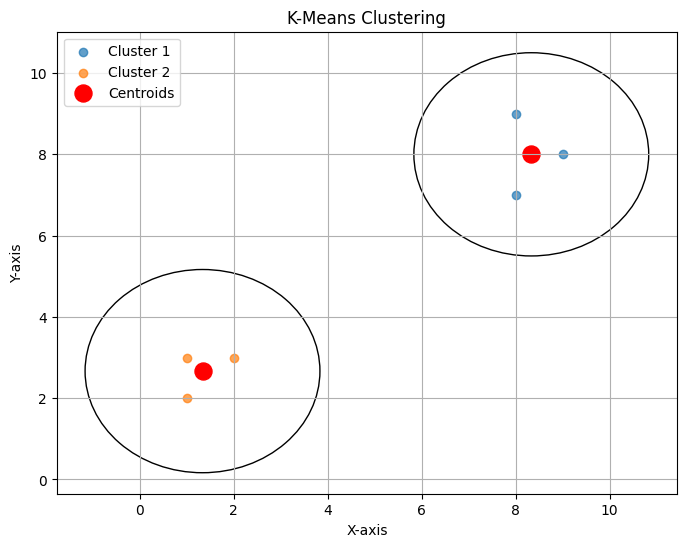

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Separate data points by cluster
clusters = [data[cluster_assignments == i] for i in range(k)]

# Create the plot
plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i + 1}', alpha=0.7)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='red', s=150, label='Centroids')

# Identify and mark outliers (data points not assigned to any cluster)
outliers = data[cluster_assignments == -1]
if len(outliers) > 0:
    plt.scatter(outliers[:, 0], outliers[:, 1], marker='x', color='black', s=50, label='Outliers')

# Add black circles around the clusters
for i, centroid in enumerate(centroids):
    circle = patches.Circle(centroid, radius=2.5, edgecolor='black', facecolor='none')
    plt.gca().add_patch(circle)

plt.title('K-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

# **ASSESSMENT**

1. **State the significance of    k    wrt    n observations in a dataset**

In the k-means algorithm, "k" represents the number of clusters you want to divide your dataset into, while "n" typically refers to the number of data points in your dataset. The significance of "k" with respect to "n" is as follows:

1. "k" is the user-defined parameter: You need to specify the value of "k" before running the k-means algorithm. The choice of "k" determines how many clusters the algorithm will try to create in your dataset.

2. Balancing clusters and data points: The value of "k" should be chosen carefully, taking into consideration the nature of your data and the problem you are trying to solve. If you choose a small "k," you may end up with too few clusters, and if you choose a large "k," you may create too many clusters. Finding the right balance is crucial to obtaining meaningful cluster assignments.

3. Impact on clustering quality: The value of "k" can significantly affect the quality of clustering. A higher "k" can lead to overfitting, where each data point gets its own cluster (poor generalization), while a lower "k" may result in underfitting, where distinct clusters are merged into one (loss of detail).

In summary, "k" in the k-means algorithm is a crucial parameter that determines the number of clusters in the output. It should be chosen based on the characteristics of your data and the goals of your analysis. The relationship between "k" and "n" reflects how many clusters you are trying to create in a dataset containing "n" data points.



---

2. **Compare kmeans with DBSCAN and MST**


| **Aspect**          | **K-Means**                              | **DBSCAN**                                              | **MST**                                                    |
|---------------------|-----------------------------------------|---------------------------------------------------------|------------------------------------------------------------|
| **Type**            | Partitioning clustering                 | Density-based clustering                                | Minimum spanning tree (not a clustering algorithm)        |
| **Number of Clusters** | Must be specified in advance       | Automatically determined based on data density         | Not applicable (MST finds tree structure, not clusters)    |
| **Cluster Shape**   | Assumes spherical, isotropic clusters | Can discover clusters of arbitrary shapes               | Not applicable (MST focuses on graph structure)            |
| **Handling Noise**  | Assigns all points to clusters       | Identifies noise points as outliers                     | Not applicable (MST doesn't distinguish noise points)       |
| **Parameter**       | Number of clusters (k)              | Epsilon (Eps) and MinPoints                             | Not applicable (MST parameter is edge weight threshold)     |
| **Core Points**     | Not applicable (K-Means has centroids) | Identifies core points and border points                | Not applicable (MST identifies edges in a graph)            |
| **Algorithm**       | Iterative centroid-based algorithm   | Density-based algorithm with connected components      | Graph-based algorithm that finds minimum spanning tree    |
| **Initialization**  | Random initial centroids             | Not applicable (starts from a data point)               | Not applicable (based on input graph)                        |
| **Suitable Data**   | Data with spherical clusters         | Data with arbitrary-shaped clusters, noise, and outliers | Data represented as a graph with edge weights               |
| **Scalability**     | Sensitive to initial centroid placement | Suitable for large datasets, but sensitive to parameters | Suitable for moderate-sized graphs                            |
| **Interpretability**| Clusters represented by centroids    | Clusters defined by connected components                | Not applicable (MST defines a tree structure)                |


---